
=== Basic Dataset Information ===
Number of records: 20640
Number of features: 10

Features in dataset:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']

=== Statistical Summary ===
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_i

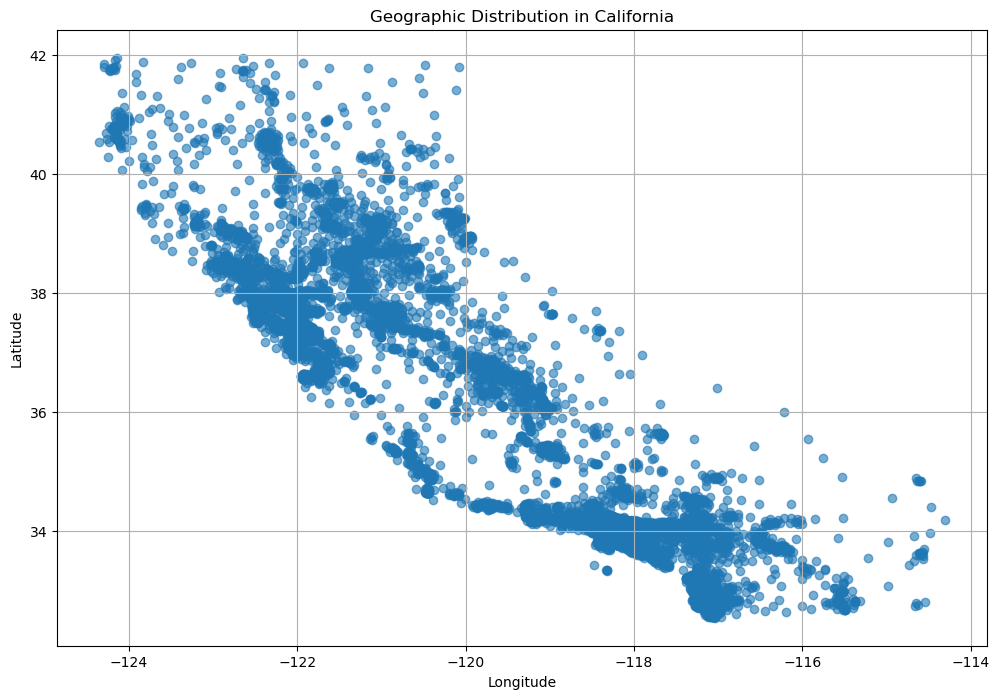


=== Regional Analysis ===

Regional statistics for housing_median_age:
             count   mean  median    std
region                                  
Central CA    6261  30.52    30.0  13.41
Northern CA   3087  24.74    22.0  11.97
Southern CA  11292  28.66    30.0  12.02

Regional statistics for total_rooms:
             count     mean  median      std
region                                      
Central CA    6261  2498.94  2104.0  1839.63
Northern CA   3087  2643.18  2152.0  2173.87
Southern CA  11292  2709.60  2131.0  2348.64

Regional statistics for total_bedrooms:
             count    mean  median     std
region                                    
Central CA    6200  501.15   417.0  361.90
Northern CA   3060  514.39   426.0  398.76
Southern CA  11173  564.68   448.0  454.88

Regional statistics for population:
             count     mean  median      std
region                                      
Central CA    6261  1315.93  1117.0  1002.34
Northern CA   3087  1253.85  100

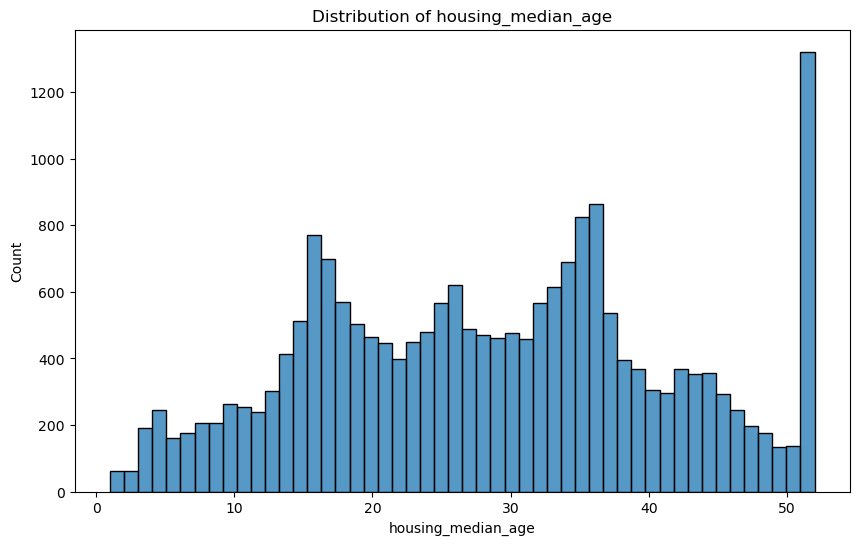

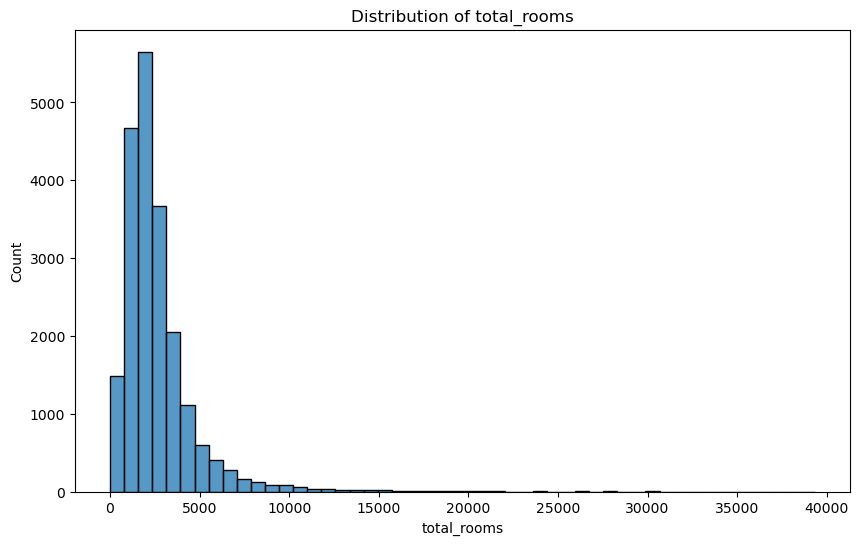

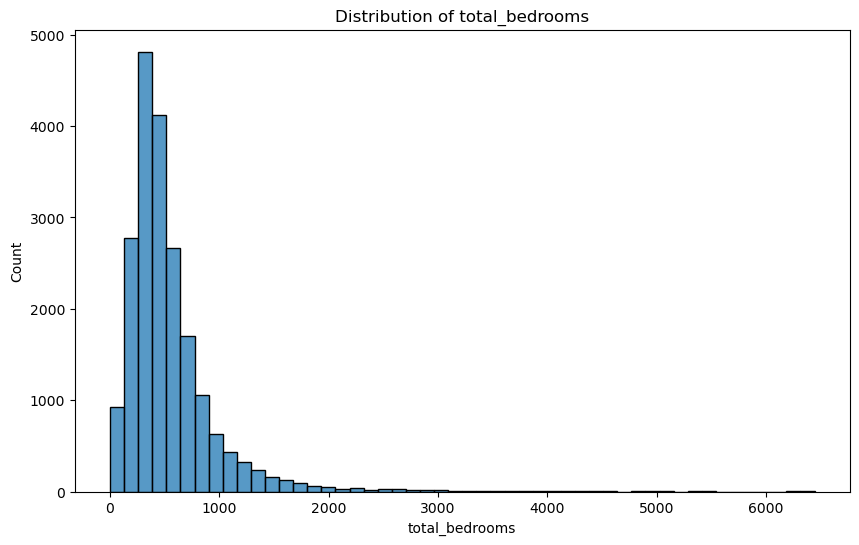

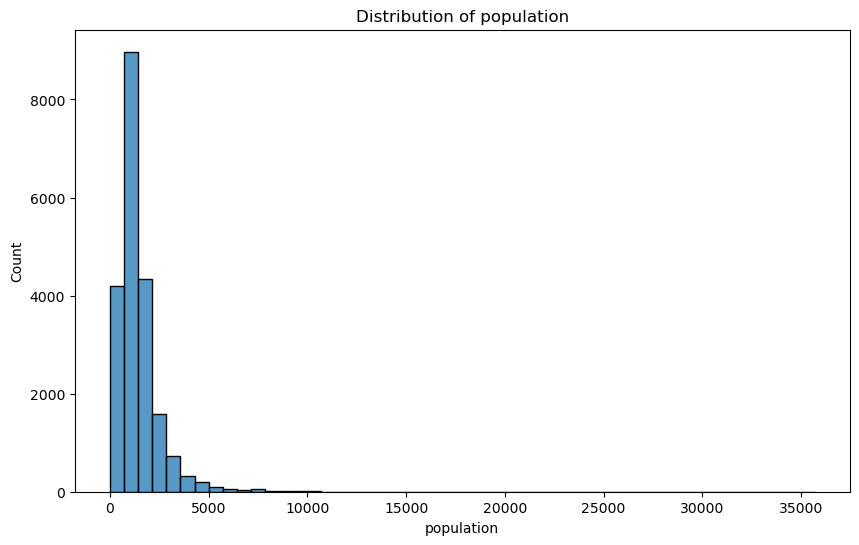

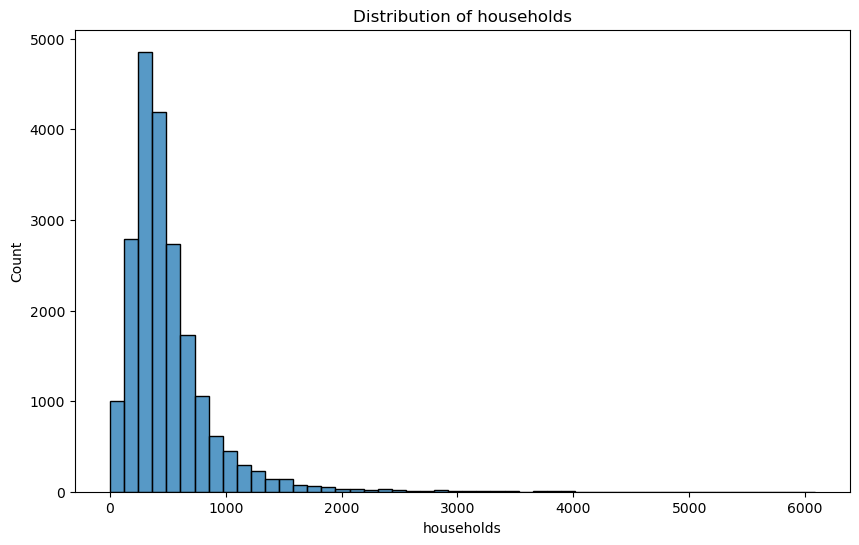

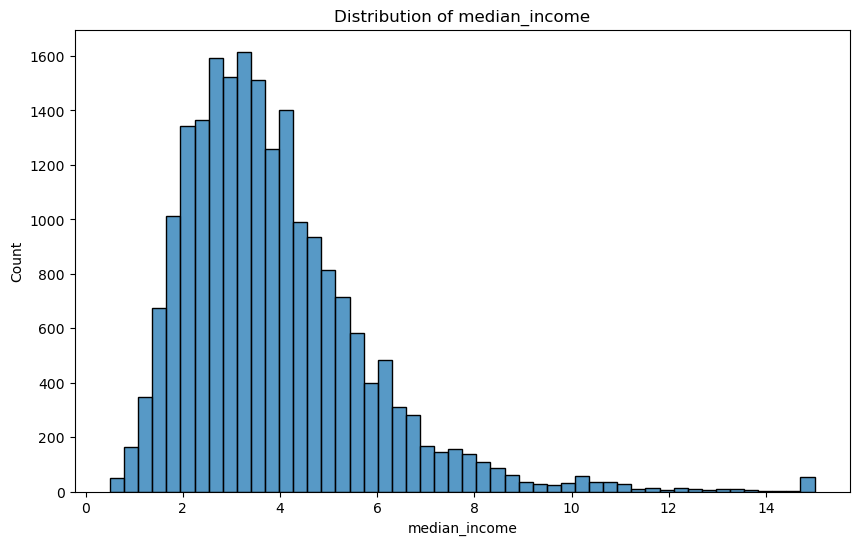

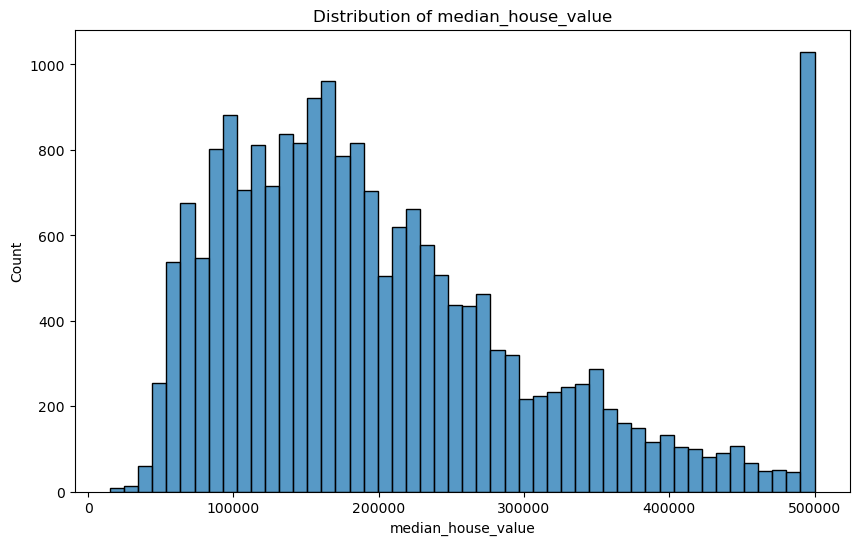

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_and_analyze_data(file_path):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Basic data information
    print("\n=== Basic Dataset Information ===")
    print(f"Number of records: {len(df)}")
    print(f"Number of features: {len(df.columns)}")
    print("\nFeatures in dataset:")
    print(df.columns.tolist())
    
    # Statistical summary
    print("\n=== Statistical Summary ===")
    print(df.describe())
    
    # Check for missing values
    print("\n=== Missing Values Analysis ===")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    
    # Check if we have geographic coordinates
    if 'latitude' in df.columns and 'longitude' in df.columns:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(df['longitude'], df['latitude'], 
                            alpha=0.6)
        plt.title('Geographic Distribution in California')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True)
        plt.show()
        
        # Calculate regional statistics
        def assign_region(row):
            if row['latitude'] >= 38:
                return 'Northern CA'
            elif row['latitude'] >= 35:
                return 'Central CA'
            else:
                return 'Southern CA'
        
        df['region'] = df.apply(assign_region, axis=1)
        
        # Regional analysis
        print("\n=== Regional Analysis ===")
        for col in df.select_dtypes(include=[np.number]).columns:
            if col not in ['latitude', 'longitude']:
                print(f"\nRegional statistics for {col}:")
                regional_stats = df.groupby('region')[col].agg([
                    'count', 'mean', 'median', 'std'
                ]).round(2)
                print(regional_stats)
    
    # Distribution plots for numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col not in ['latitude', 'longitude']:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=df, x=col, bins=50)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

    
    return df

# Run the analysis
try:
    df = load_and_analyze_data(file_path)
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nPlease ensure your file path is correct and the file contains the expected data.")

The cluster around latitude 34° and longitude -118° likely represents the Greater Los Angeles area
The grouping around latitude 38° and longitude -122° probably represents the San Francisco Bay Area
Many of the populated areas follow California's coastline, which is reflected in the general curve of the point distribution
This makes sense historically as many of California's major cities developed along the coast
Most areas (shown in light blue) have relatively lower density (around 250-500 people per unit area)
There are very few red dots, indicating that only a small number of areas have very high population density (1000+ people per unit area)

In [112]:
import folium

# Create a map centered around California
california_map = folium.Map(location=[top_density_areas['latitude'].mean(), 
                                      top_density_areas['longitude'].mean()], zoom_start=6)

# Add density points to the map
for _, row in top_density_areas.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['population_density'] / 1000,  # Scale size
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Density: {row['population_density']:.2f}"
    ).add_to(california_map)

# Show the map
california_map


Highest density the location appears to be near Sacramento, in California.

lowest density the location in Lancaster, California.

Latitude 38.32, Longitude -121.98 (Inland) – Extremely high population density (392.63 people per room).
Latitude 40.41, Longitude -120.51 (Inland) – Population density of 116.61.
Latitude 35.32, Longitude -120.70 (Near Ocean) – Population density of 55.36.
Latitude 38.69, Longitude -121.15 (Inland) – Population density of 27.81.
Latitude 34.47, Longitude -118.59 (Inland) – Population density of 16.23.
